# Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copy data zip files to Colab working space

In [4]:
# 다운로드 받고 구글 드라이브에 해당 파일을 넣은 경로를 아래 cp -r '   '에  입력해주시면 됩니다.
!cp -r '/content/drive/MyDrive/Colab Notebooks/fish_data.zip' fish_data_small.zip
!cp -r '/content/drive/MyDrive/Colab Notebooks/fish_data_small.zip' fish_data.zip

# Extract zip files

In [5]:
!unzip /content/fish_data_small.zip
!unzip /content/fish_data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fish_data/train/6_Cham_dom/023167.jpg  
  inflating: fish_data/train/6_Cham_dom/023489.jpg  
  inflating: fish_data/train/6_Cham_dom/023495.jpg  
  inflating: fish_data/train/6_Cham_dom/023755.jpg  
  inflating: fish_data/train/6_Cham_dom/024007.jpg  
  inflating: fish_data/train/6_Cham_dom/024481.jpg  
  inflating: fish_data/train/6_Cham_dom/025280.jpg  
  inflating: fish_data/train/6_Cham_dom/025459.jpg  
  inflating: fish_data/train/6_Cham_dom/025497.jpg  
  inflating: fish_data/train/6_Cham_dom/025656.jpg  
  inflating: fish_data/train/6_Cham_dom/025816.jpg  
  inflating: fish_data/train/6_Cham_dom/025889.jpg  
  inflating: fish_data/train/6_Cham_dom/025941.jpg  
  inflating: fish_data/train/6_Cham_dom/026002.jpg  
  inflating: fish_data/train/6_Cham_dom/029198.jpg  
  inflating: fish_data/train/6_Cham_dom/030224.jpg  
  inflating: fish_data/train/6_Cham_dom/031416.jpg  
  inflating: fish_data/train/6_Cham_dom/031667.jpg  
  inflatin

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
%load_ext tensorboard
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K

In [7]:
# // train_data path
train_path = "/content/fish_data_small/train/"
#// test_data path
test_path="/content/fish_data_small/test/"

# Get the data labels

In [8]:
labels=[]
label_paths = glob.glob(train_path+"*")
for t_path in label_paths:
    labels.append(t_path[len(train_path):])
labels.sort()

#라벨들을 프린트 하시오
print(labels)

['10_Kanari', '1_Ko_dung_uh', '2_Thom_bang_yi', '3_Bang_uh_dom', '4_Bum-dom', '5_Yong-chi', '6_Cham_dom', '7_Jul_jun', '8_Gam_sung_dom', '9_Nong_uh']


# Load training data

In [29]:
picture_size = 150
train_data = []
train_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(train_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        #print("loading "+img_file)
        img = cv2.imread(img_file)
        img = cv2.resize(img,(picture_size,picture_size))
        train_data.append(img)
        train_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 200
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 200
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 200
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 200
4_Bum-dom
data size for 4_Bum-dom : 200
5_Yong-chi
data size for 5_Yong-chi : 200
6_Cham_dom
data size for 6_Cham_dom : 200
7_Jul_jun
data size for 7_Jul_jun : 200
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 200
9_Nong_uh
data size for 9_Nong_uh : 200


In [30]:
print(np.array(train_data).shape)

(2000, 150, 150, 3)


In [31]:
index = np.arange(len(train_data))
np.random.shuffle(index)

In [32]:
print(index)

[ 889  816 1591 ...  409 1004 1348]


In [33]:
train_data = np.array(train_data)[index]
train_data_label = np.array(train_data_label)[index]

In [34]:
print(train_data_label)

[4 4 7 ... 2 5 6]


In [24]:
!pip install autokeras

     |████████████████████████████████| 174kB 5.2MB/s 
     |████████████████████████████████| 102kB 5.6MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=57cf92feb9410d755916f8cad574f02dfcd637432551d2d55dc62e1585f47fdc
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


Label:  5_Yong-chi


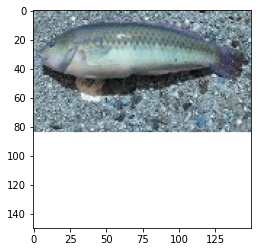

In [10]:
plt.imshow(train_data[1000])
print("Label: ", labels[train_data_label[1000]])
plt.show()

In [11]:
len(train_data)

2000

In [12]:
train_data[0].shape

(150, 150, 3)

# Load test data

In [ ]:
picture_size = 150
test_data = []
test_data_label =[]

#test_data와 test_data_label에 적절한 데이터를 채우시오 (train_data 참고)
#code here
for lable in labels:
  print(lable)
  imag_files=glob.glob(test_path+lable+"/*.*")
  num_label=labels.index(label)
  print("data size for "+label+" : "+ str(len(img_files)))
  for img_file in img_files:
    img = cv2.imread(img_file)
    img = cv2.resize(img,(picture_size,picture_size))
    test_data.append(img)
    test_data_label.append(num_label)


10_Kanari
data size for 9_Nong_uh : 200
1_Ko_dung_uh
data size for 9_Nong_uh : 200
2_Thom_bang_yi
data size for 9_Nong_uh : 200
3_Bang_uh_dom
data size for 9_Nong_uh : 200
4_Bum-dom
data size for 9_Nong_uh : 200
5_Yong-chi
data size for 9_Nong_uh : 200
6_Cham_dom
data size for 9_Nong_uh : 200
7_Jul_jun
data size for 9_Nong_uh : 200
8_Gam_sung_dom
data size for 9_Nong_uh : 200
9_Nong_uh
data size for 9_Nong_uh : 200


In [ ]:
len(test_data)

2000

In [ ]:
test_data[0].shape

(150, 150, 3)

# Data preparation

In [ ]:
x = np.array(train_data)
y = np.array(train_data_label)

#train_test_split를 이용하여 훈련데이터셋과 검증데이터셋으로 나누기. 검증데이터셋 20%, 인자로 random_state = 230 지정
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=230)

Y_train = to_categorical(y_train, len(labels))
Y_val = to_categorical(y_val, len(labels))

#test_data[]와 test_data_lable[]을 이용하여 테스트셋 생성
X_test = np.array(test_data)    # code here:  test_data 이용
y_test = np.array(test_data_label)    # code here: test_data_label 이용
Y_test = to_categorical(y_test,len(labels))     # code here: y_test를 one_hot vector로 변환

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# for training data, we apply normalize, randomly rotate, shift and flip, etc.

val_test_datagen = ImageDataGenerator(rescale=1./255.)
# for validation and test sets, we only normalize

train_generator = train_datagen.flow(X_train,Y_train,batch_size=64)
validation_generator = val_test_datagen.flow(X_val,Y_val,batch_size=64)
test_generator = val_test_datagen.flow(X_test,Y_test,batch_size=64)

# Autokeras

In [35]:
X_test = train_data[:400]
y_test = train_data_label[:400]
X_valid = train_data[400:800]
y_valid = train_data_label[400:800]
X_train = train_data[800:]
y_train = train_data_label[800:]

In [36]:
import autokeras as ak

In [ ]:
clf =d ak.ImageClassifier(overwrite=True, max_trials=5)

clf.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Trial 1 Complete [00h 20m 26s]
val_loss: 1.5285615921020508

Best val_loss So Far: 1.5285615921020508
Total elapsed time: 00h 20m 26s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
image_block_1/b...|resnet            |vanilla           
image_block_1/n...|True              |True              
image_block_1/a...|True              |False             
image_block_1/i...|True              |None              
image_block_1/i...|True              |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0                 |None              
image_block_1/i...|0.1               |None              
image_block_1/i...|0                 |None              
image_block_1/r...|False             |None              
image_block_1/r...|resnet50          |None              
image_block_1/r...|True              |None              
classification_...|global_avg        |flatten           
classification_...|0                 |0.5

KeyboardInterrupt: ignored